# 1. Evaluating risk and return 

In [1]:
import numpy as np
import pandas as pd

In [32]:
prices = pd.DataFrame({"Blue":[8.7,8.9,8.5,8.2],
                      "Orange":[10.5,11,10.6,11.7]})
prices

,Blue,Orange
0,8.7,10.5
1,8.9,11.0
2,8.5,10.6
3,8.2,11.7


In [33]:
#iloc: index location
prices.iloc[2:]

,Blue,Orange
2,8.5,10.6
3,8.2,11.7


In [4]:
prices.pct_change()

,Blue,Orange
0,NaN,NaN
1,0.022989,0.047619
2,-0.044944,-0.036364
3,-0.035294,0.103774


In [5]:
prices = pd.read_csv("data/data1_prices.csv")
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [6]:
returns = prices.pct_change()
returns.head(3)

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638


In [8]:
returns = returns.dropna()
returns.head(3)

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232


<Axes: >

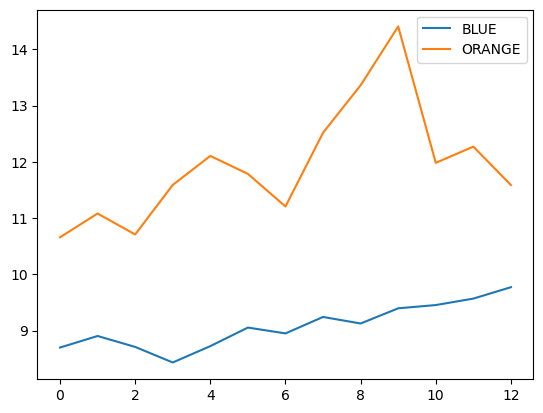

In [9]:
prices.plot()

<Axes: >

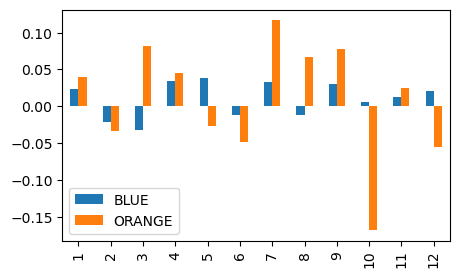

In [10]:
returns.plot.bar(figsize=(5,3))

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [12]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [13]:
(1+returns).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [21]:
returns = pd.read_csv("data/data1_Portfolios_Formed_on_ME_EW_monthly.csv",
                     header=0, index_col=0, na_values=-99.99)

returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
192607,NaN,-0.43,1.46,2.66,-0.57,0.37,1.71,1.49,3.27,-1.42,0.29,-0.15,0.88,1.48,1.94,1.54,1.44,3.06,3.48
192608,NaN,3.74,3.03,2.09,3.60,3.64,3.67,1.56,2.35,4.61,2.59,4.03,3.24,2.50,4.85,1.54,1.57,1.18,3.52
192609,NaN,-1.07,-0.48,0.01,-0.48,-1.55,0.03,-0.41,-0.15,0.91,-1.87,-2.27,-0.84,0.13,-0.08,-1.15,0.32,-1.00,0.68
192610,NaN,-3.29,-3.55,-3.07,-3.25,-4.18,-2.95,-3.31,-2.96,-4.72,-1.77,-3.36,-5.01,-3.20,-2.69,-3.31,-3.30,-3.56,-2.37
192611,NaN,-0.46,3.82,3.11,-0.54,2.25,3.37,3.41,3.13,-0.77,-0.32,-0.29,4.79,3.19,3.54,3.74,3.07,3.59,2.68


In [22]:
columns = ['Lo 10','Hi 10']
returns = returns[columns]
returns.head(3)

,Lo 10,Hi 10
192607,-1.42,3.48
192608,4.61,3.52
192609,0.91,0.68


In [23]:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0142,0.0348
192608,0.0461,0.0352
192609,0.0091,0.0068
192610,-0.0472,-0.0237
192611,-0.0077,0.0268


<Axes: >

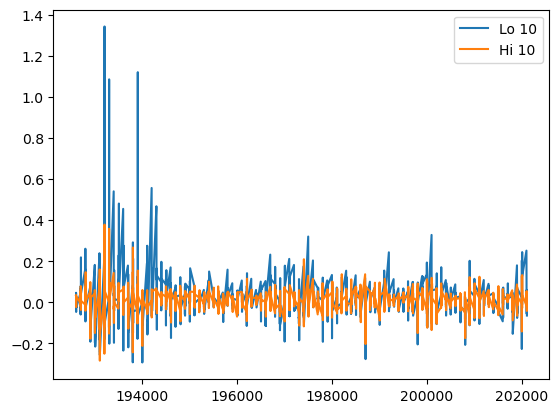

In [24]:
returns.plot()

In [25]:
returns.mean()

Lo 10    0.017934
Hi 10    0.009158
dtype: float64

In [26]:
returns.std()

Lo 10    0.105529
Hi 10    0.053829
dtype: float64

In [27]:
vol_annual = returns.std() * (12**0.5)
vol_annual

Lo 10    0.365563
Hi 10    0.186470
dtype: float64

In [28]:
returns.shape

(1145, 2)

In [29]:
n_months = returns.shape[0]
n_years = n_months/12
n_years

95.41666666666667

In [35]:
returns.columns=['SmallCap', 'LargeCap']
returns.head(3)

,SmallCap,LargeCap
192607,-0.0142,0.0348
192608,0.0461,0.0352
192609,0.0091,0.0068


In [37]:
annual_vol = returns.std()*np.sqrt(12)
annual_vol

SmallCap    0.365563
LargeCap    0.186470
dtype: float64

In [38]:
annual_return = (1+returns).prod()**(1/n_years)-1
annual_return

SmallCap    0.172696
LargeCap    0.096613
dtype: float64

In [39]:
annual_return/annual_vol

SmallCap    0.472410
LargeCap    0.518113
dtype: float64

In [40]:
rf=0.03
sharpe_ratio = (annual_return-rf)/annual_vol
sharpe_ratio

SmallCap    0.390345
LargeCap    0.357229
dtype: float64